#Librerias

In [ ]:
import pandas as pd 
import numpy as np 
import plotly
import matplotlib.pyplot as plt 
import seaborn as sns 

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

#Carga del Dataset.

In [ ]:
data = pd.read_csv("https://sutevalle.org/wp-content/uploads/2023/05/water_potability.csv")
df = pd.DataFrame(data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

EEl dataset se encuentra desbalanceado 

<Axes: xlabel='Potability', ylabel='count'>

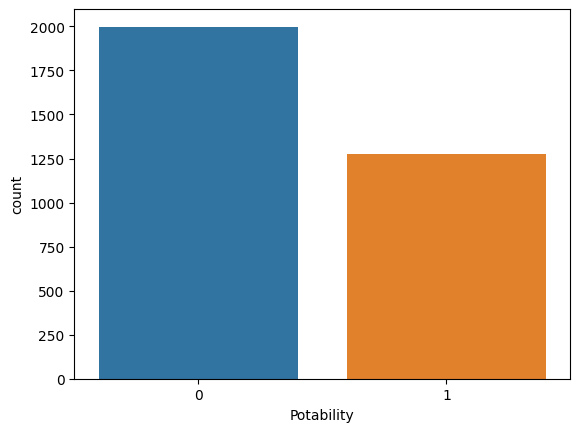

In [ ]:
sns.countplot(data = df, x = 'Potability')

<Axes: ylabel='Potability'>

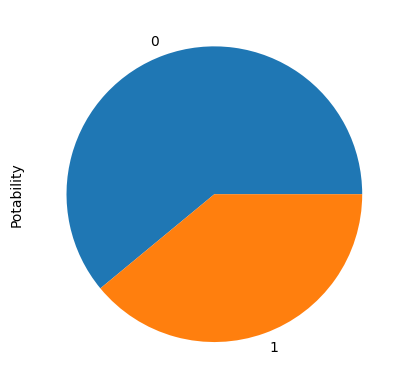

In [ ]:
df.Potability.value_counts().plot(kind ='pie')

In [ ]:
df.drop('Potability', axis=1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Text(0.5, 0.92, 'Correlaciones Agua Potable')

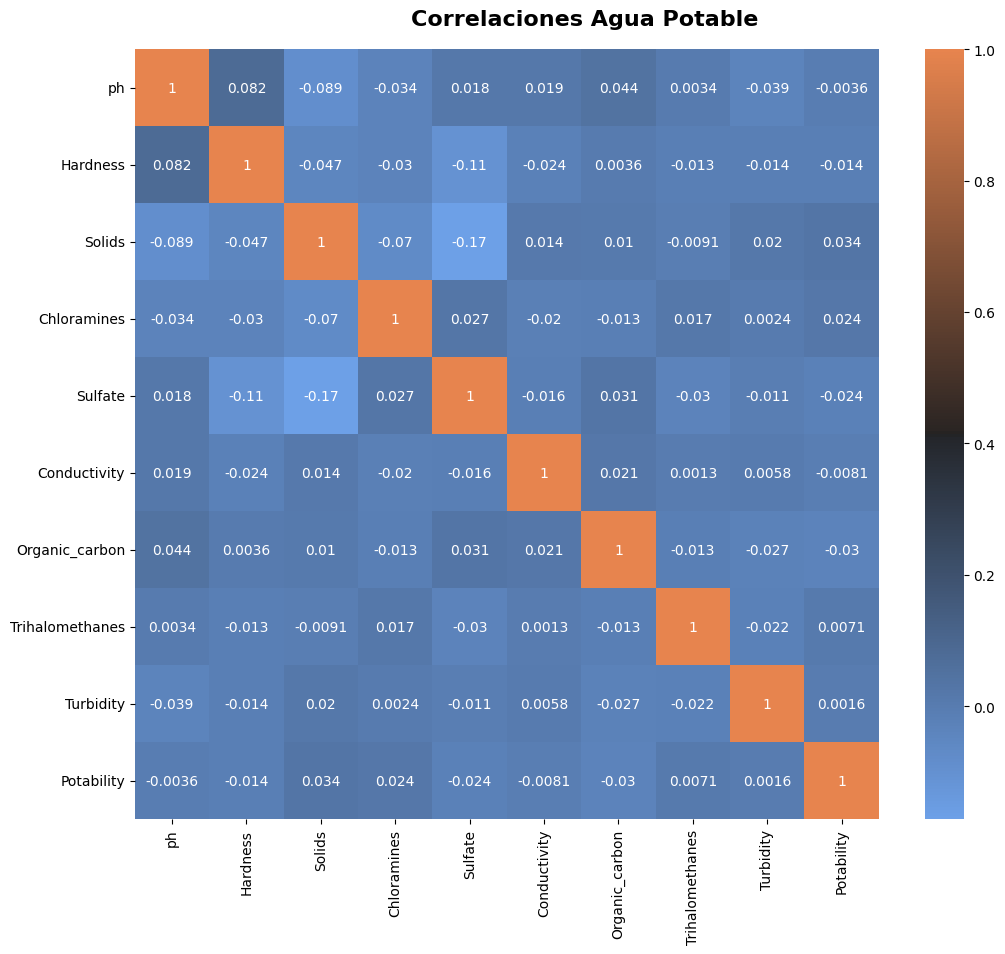

In [ ]:
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.heatmap(df.corr(), annot = True, cmap=cmap)
plt.suptitle('Correlaciones Agua Potable', y = 0.92, size = 16, color = 'black', weight='bold')

In [ ]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

Text(0.5, 1.01, 'Water Quality Box-Plot')

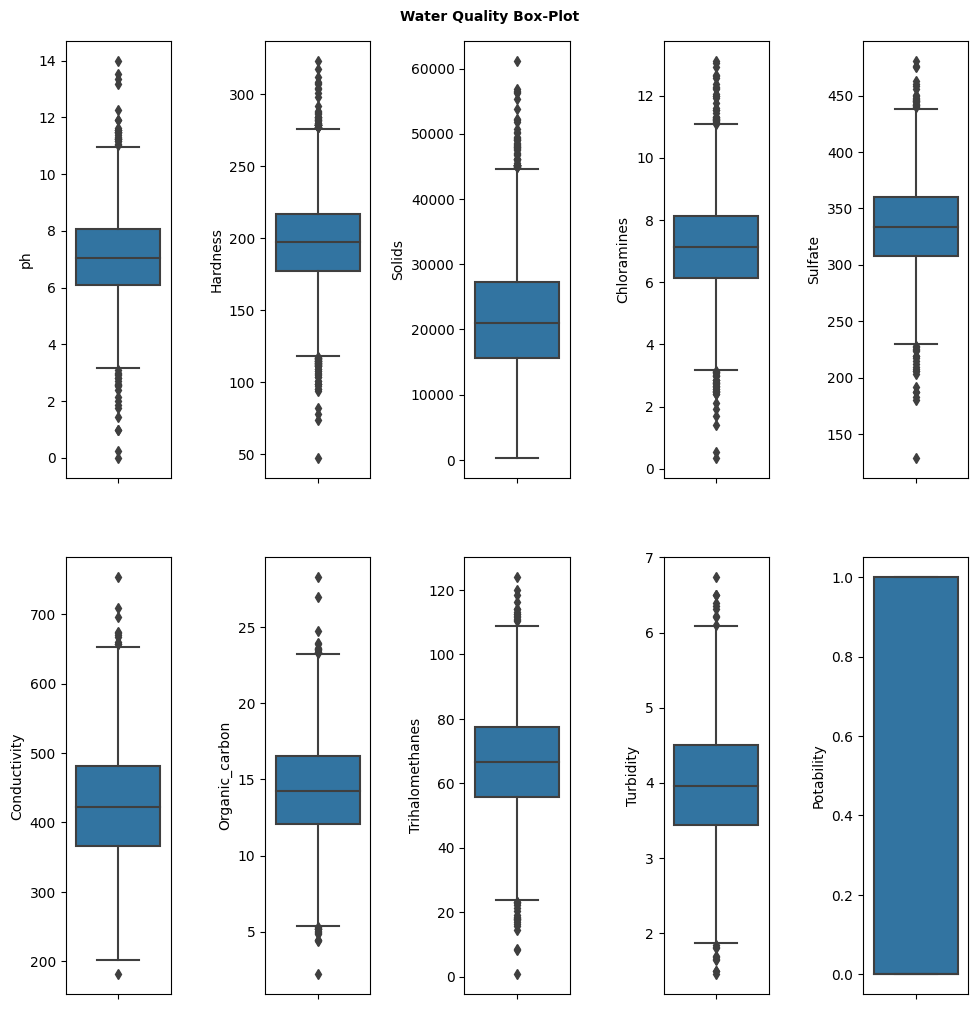

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(10,10))
index = 0
ax = ax.flatten()

for attributeCol, value in df.items():
    sns.boxplot(y=attributeCol, data=df, ax=ax[index],)
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)

plt.suptitle('Water Quality Box-Plot',y=1.01, size = 10, color = 'black', weight='bold')

QUITAR LOS VALORES FALTANTES

In [ ]:
df.isna().any().any()

True

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.isnull().mean()*100 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [ ]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

In [ ]:
df=df.dropna()
df1 = df.copy()

In [ ]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#QUITAR LOS OUTLIERS
3 Desviaciones Standard

In [ ]:
from scipy import stats

df_water = df1.copy()
df_water = df_water[(np.abs(stats.zscore(df1)) <= 3).all(axis=1)]

In [ ]:
df_water.shape

(1929, 10)

Text(0.5, 1.01, 'CALIDAD DEL AGUA (SIN OUTLIERS)')

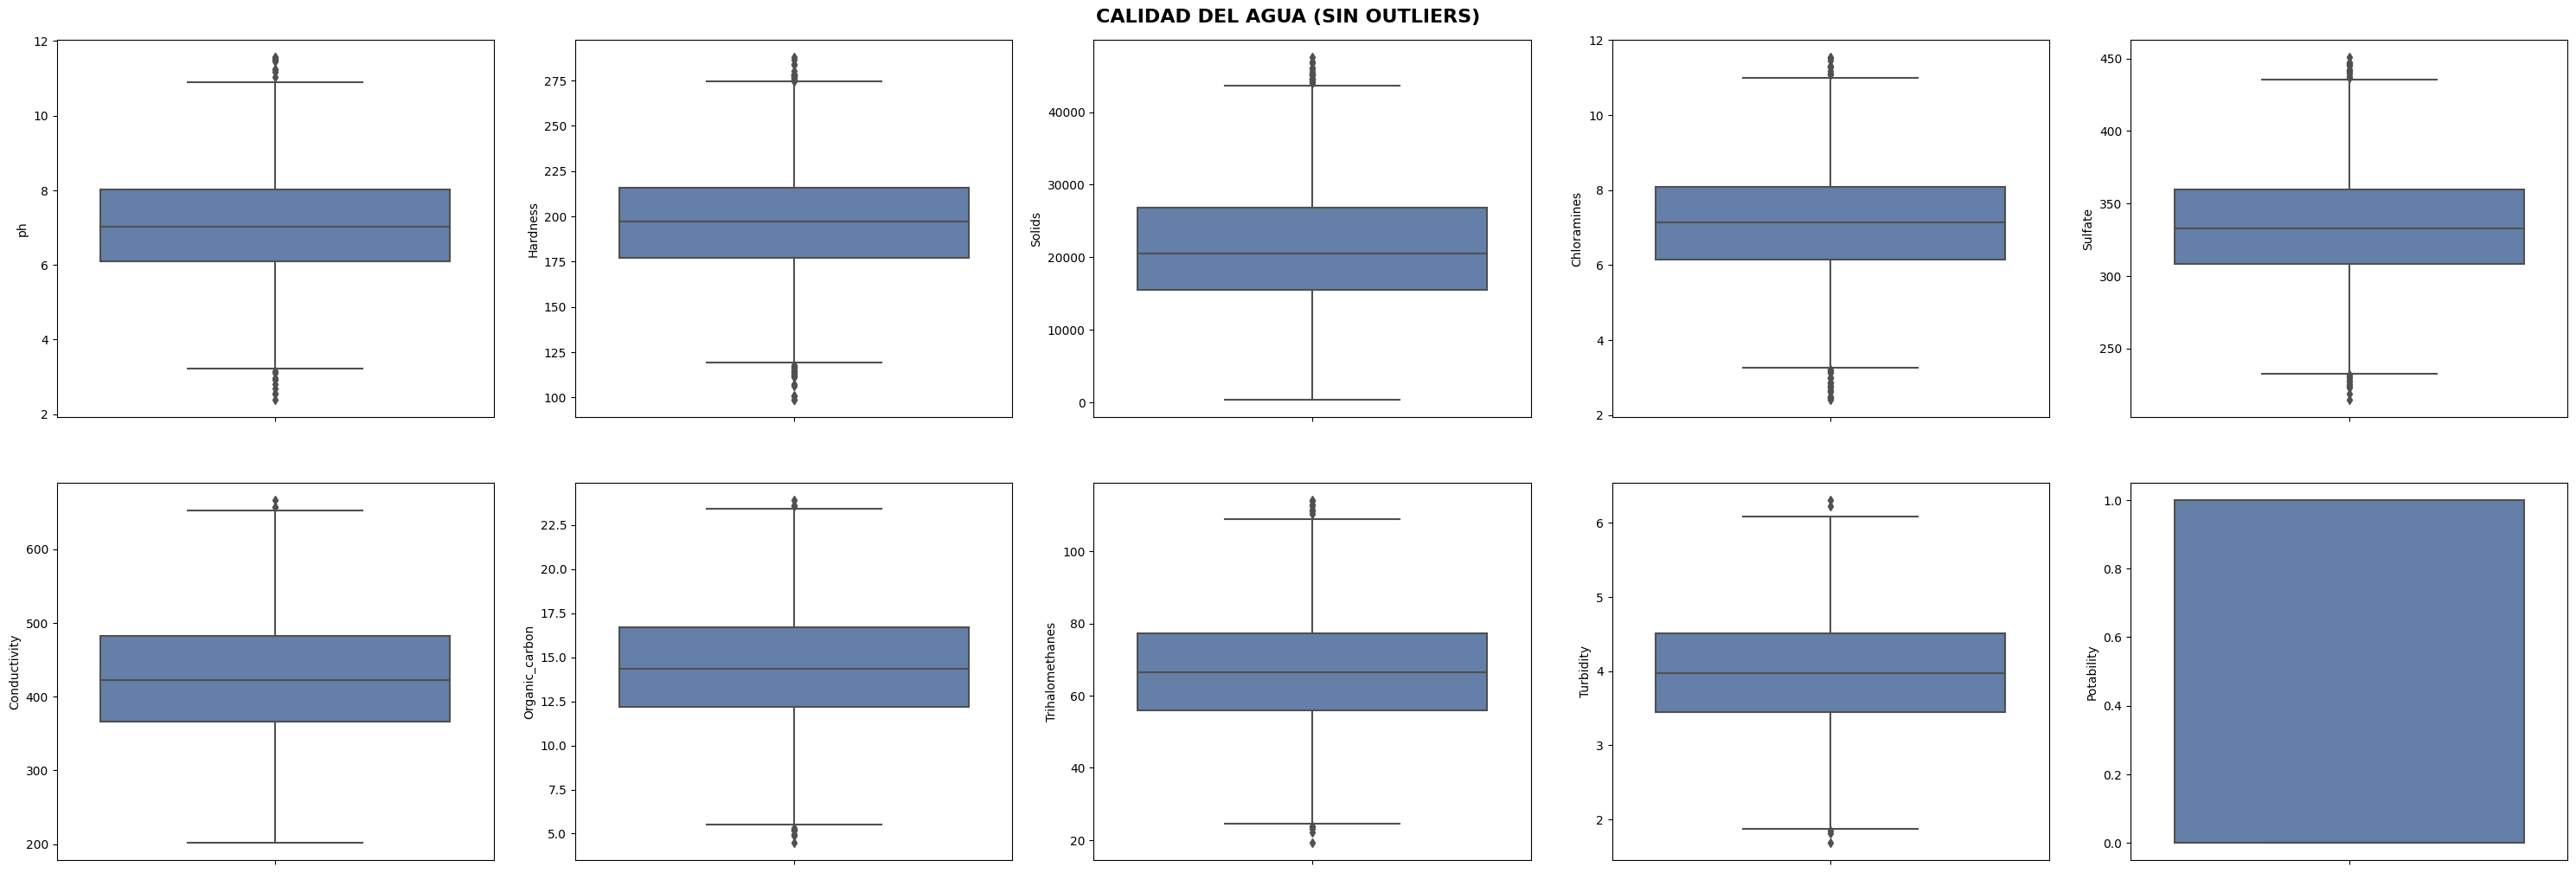

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30,10))
index = 0
ax = ax.flatten()

for attributeCol, value in df_water.items():
    sns.boxplot(y=attributeCol, data=df_water, ax=ax[index], color='#597eb3')
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)
plt.suptitle('CALIDAD DEL AGUA (SIN OUTLIERS)',y=1.01, size = 16, color = 'black', weight='bold')

BALANCEO DE CLASES

In [ ]:
count_class_0, count_class_1 = df_water.Potability.value_counts()

df_class_0 = df_water[df_water['Potability'] == 0]
df_class_1 = df_water[df_water['Potability'] == 1]

Random over-sampling:
0    1165
1    1165
Name: Potability, dtype: int64


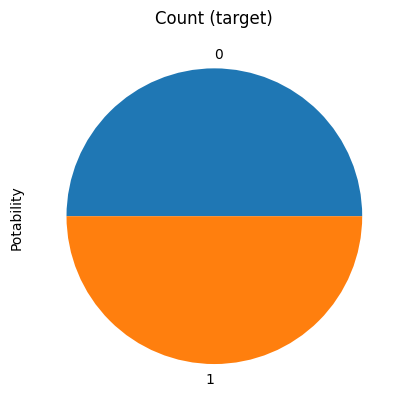

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Potability.value_counts())

df_test_over.Potability.value_counts().plot(kind='pie', title='Count (target)');

PREPROCESAMIENTO, NORMALIZACIÓN Y SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X = df_test_over.drop('Potability',axis=1)
y = df_test_over['Potability']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [ ]:
print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (1864, 9) 
y_train: (1864,)
X_test: (466, 9) 
y_test: (466,)


#ENTRENAMIENTO

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#1. REGRESIÓN LÓGISTICA

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_pred = LogReg.predict(X_test)
LogReg_acc = accuracy_score(y_test, LogReg_pred)
LogReg_mae = mean_absolute_error(y_test, LogReg_pred)
LogReg_mse = mean_squared_error(y_test, LogReg_pred)
LogReg_rmse = np.sqrt(mean_squared_error(y_test, LogReg_pred))
LogReg_precision = precision_score(y_test, LogReg_pred)
LogReg_recall = recall_score(y_test, LogReg_pred)
LogReg_f1 = f1_score(y_test, LogReg_pred)

In [ ]:
print("The accuracy for Logistic Regression is", LogReg_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))

The accuracy for Logistic Regression is 0.4978540772532189
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       238
           1       0.49      0.51      0.50       228

    accuracy                           0.50       466
   macro avg       0.50      0.50      0.50       466
weighted avg       0.50      0.50      0.50       466



Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

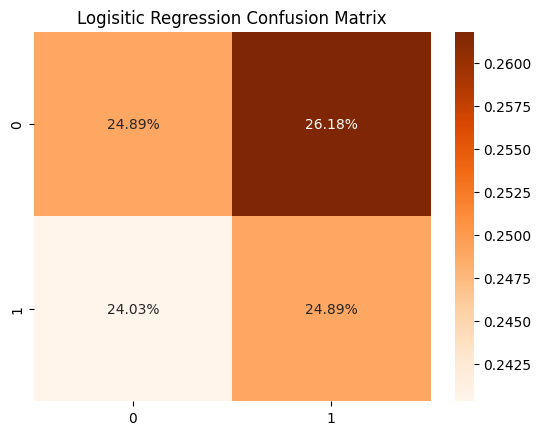

In [ ]:
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm/np.sum(LogReg_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Logisitic Regression Confusion Matrix")

#2. K-Nearest

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_mae = mean_absolute_error(y_test, KNN_pred)
KNN_mse = mean_squared_error(y_test, KNN_pred)
KNN_rmse = np.sqrt(mean_squared_error(y_test, KNN_pred))
KNN_precision = precision_score(y_test, KNN_pred) 
KNN_recall = recall_score(y_test, KNN_pred) 
KNN_f1 = f1_score(y_test, KNN_pred)

In [ ]:
print("The accuracy for KNeighbors is", KNN_acc)
print("The classification report using KNeighbors is:", KNN_acc)
print(classification_report(y_test, KNN_pred))

The accuracy for KNeighbors is 0.6952789699570815
The classification report using KNeighbors is: 0.6952789699570815
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       238
           1       0.68      0.71      0.70       228

    accuracy                           0.70       466
   macro avg       0.70      0.70      0.70       466
weighted avg       0.70      0.70      0.70       466



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

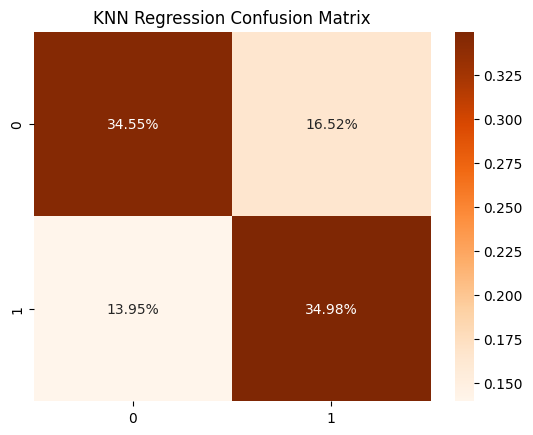

In [ ]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("KNN Regression Confusion Matrix")

#3. Decision Tree

In [ ]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
DecTree_pred = DecTree.predict(X_test)
DecTree_acc = accuracy_score(y_test, DecTree_pred)
DecTree_precision = precision_score(y_test, DecTree_pred) 
DecTree_recall = recall_score(y_test, DecTree_pred) 
DecTree_f1 = f1_score(y_test, DecTree_pred)

In [ ]:
print("The accuracy for Decision Tree is", DecTree_acc)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DecTree_pred))

The accuracy for Decision Tree is 0.796137339055794
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       238
           1       0.75      0.88      0.81       228

    accuracy                           0.80       466
   macro avg       0.80      0.80      0.80       466
weighted avg       0.81      0.80      0.80       466



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

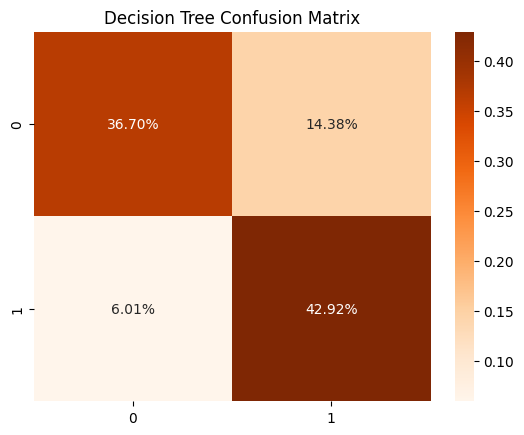

In [ ]:
DecTree_cm = confusion_matrix(y_test, DecTree_pred)
sns.heatmap(DecTree_cm/np.sum(DecTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Decision Tree Confusion Matrix")

#4. Random Forest

In [ ]:
RFTree = RandomForestClassifier()
RFTree.fit(X_train, y_train)
RFTree_pred = RFTree.predict(X_test)
RFTree_acc = accuracy_score(y_test, RFTree_pred)
RFTree_precision = precision_score(y_test, RFTree_pred) 
RFTree_recall = recall_score(y_test, RFTree_pred) 
RFTree_f1 = f1_score(y_test, RFTree_pred)

In [ ]:
print("The accuracy for Random Forest is", RFTree_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RFTree_pred))

The accuracy for Random Forest is 0.8412017167381974
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       238
           1       0.85      0.82      0.84       228

    accuracy                           0.84       466
   macro avg       0.84      0.84      0.84       466
weighted avg       0.84      0.84      0.84       466



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

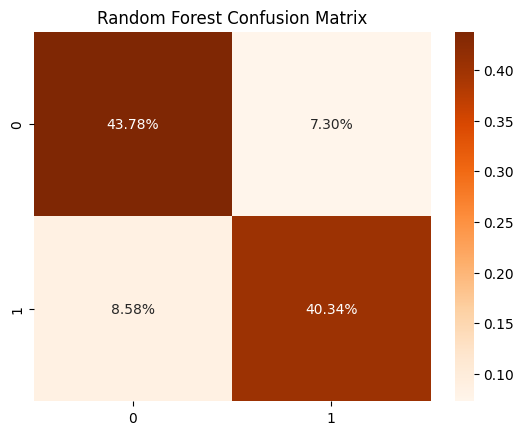

In [ ]:
RFTree_cm = confusion_matrix(y_test, RFTree_pred)
sns.heatmap(RFTree_cm/np.sum(RFTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Random Forest Confusion Matrix")

#5. SVM

In [ ]:
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred) 
SVM_recall = recall_score(y_test, SVM_pred) 
SVM_f1 = f1_score(y_test, SVM_pred)

In [ ]:
print("The accuracy for SVM is", SVM_acc)
print("The classification report using SVM is:", SVM_acc)
print(classification_report(y_test, SVM_pred))

The accuracy for SVM is 0.6974248927038627
The classification report using SVM is: 0.6974248927038627
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       238
           1       0.70      0.66      0.68       228

    accuracy                           0.70       466
   macro avg       0.70      0.70      0.70       466
weighted avg       0.70      0.70      0.70       466



Text(0.5, 1.0, 'SVM Confusion Matrix')

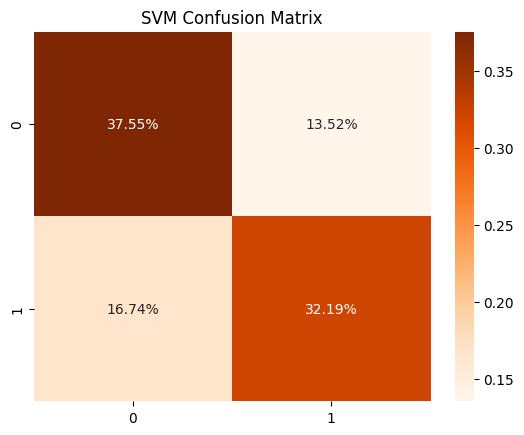

In [ ]:
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("SVM Confusion Matrix")

#6. XGBoost 

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
XGB_acc = accuracy_score(y_test, XGB_pred)
XGB_precision = precision_score(y_test, XGB_pred)
XGB_recall = recall_score(y_test, XGB_pred)
XGB_f1 = f1_score(y_test, XGB_pred)

In [ ]:
print("The accuracy for XGBoost is", XGB_acc)
print("The classification report using XGBoost is:", XGB_acc)
print(classification_report(y_test, XGB_pred))

The accuracy for XGBoost is 0.8111587982832618
The classification report using XGBoost is: 0.8111587982832618
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       238
           1       0.79      0.84      0.81       228

    accuracy                           0.81       466
   macro avg       0.81      0.81      0.81       466
weighted avg       0.81      0.81      0.81       466



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

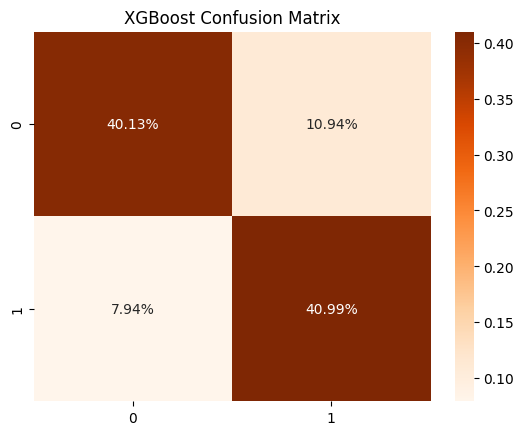

In [ ]:
XGB_cm = confusion_matrix(y_test, XGB_pred)
sns.heatmap(XGB_cm/np.sum(XGB_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("XGBoost Confusion Matrix")

#REDES NEURONALES

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs')
nn.fit(X, y)
nn_pred = nn.predict(X_test)
nn_acc = accuracy_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)

#COMPARACIÓN DE LOS MODELOS

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost', 'Redes N'],
    'Accuracy' :[LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc, XGB_acc, nn_acc],
    'Precision' :[LogReg_precision, KNN_precision, DecTree_precision, RFTree_precision, SVM_precision, XGB_precision, nn_precision],
    'Recall' :[LogReg_recall, KNN_recall, DecTree_recall, RFTree_recall, SVM_recall, XGB_recall, nn_recall],
    'F1 Score' :[LogReg_f1, KNN_f1, DecTree_f1, RFTree_f1, SVM_f1, XGB_f1, nn_f1]
})
models = models.sort_values(by='F1 Score', ascending=False)

In [ ]:
models

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.841202,0.846847,0.824561,0.835556
5,XGBoost,0.811159,0.789256,0.837719,0.812766
2,Decision Tree,0.796137,0.749064,0.877193,0.808081
1,KNN Regression,0.695279,0.679167,0.714912,0.696581
4,Support Vector,0.697425,0.704225,0.657895,0.680272
0,Logistic Regression,0.497854,0.487395,0.508772,0.497854
6,Redes N,0.525751,0.520710,0.385965,0.443325


#TUNEO DE PARÁMETROS

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

lgr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)
redn =MLPClassifier()

In [ ]:
para_lgr = {'solver':['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}
grid_lgr = GridSearchCV(lgr, param_grid=para_lgr, cv=5)
grid_lgr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lgr.best_params_)

Best parameters for Logistic Regression: {'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
para_knn = {'n_neighbors':np.arange(1, 50), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 44, 'weights': 'distance'}


In [ ]:
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) 
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 1}


In [ ]:
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}


In [ ]:
para_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_svc = GridSearchCV(svc, param_grid=para_svc, cv=5)
grid_svc.fit(X_train, y_train)
print("Best parameters for SVM:", grid_svc.best_params_)

Best parameters for SVM: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)
rs_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.2}


In [ ]:
para_redn = {'solver':['lbfgs' , 'sgd', 'adam'], 'alpha': [0.001,0.001], 'activation': ['identity', 'logistic', 'tanh', 'relu'], }
rs_redn =  RandomizedSearchCV(redn, param_distributions=para_redn, cv=5)
rs_redn.fit(X_train, y_train)
print("Best parameters for Red Neu.:", rs_redn.best_params_)

Best parameters for Red Neu.: {'solver': 'lbfgs', 'alpha': 0.001, 'activation': 'relu'}


#USANDO LOS HIPER-PARAMETROS RECOMENDADOS

REGRESIÓN LÓGISTICA TUNEADO

In [ ]:
LogReg2 = LogisticRegression(penalty = 'l1', solver= 'liblinear')
LogReg2.fit(X_train, y_train)
LogReg2_pred = LogReg2.predict(X_test)
LogReg2_acc = accuracy_score(y_test, LogReg2_pred)
LogReg2_mae = mean_absolute_error(y_test, LogReg2_pred)
LogReg2_mse = mean_squared_error(y_test, LogReg2_pred)
LogReg2_rmse = np.sqrt(mean_squared_error(y_test, LogReg2_pred))
LogReg2_precision = precision_score(y_test, LogReg2_pred)
LogReg2_recall = recall_score(y_test, LogReg2_pred)
LogReg2_f1 = f1_score(y_test, LogReg2_pred)

In [ ]:
print("The accuracy for Logistic Regression is", LogReg2_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg2_pred))

The accuracy for Logistic Regression is 0.4957081545064378
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       238
           1       0.49      0.50      0.49       228

    accuracy                           0.50       466
   macro avg       0.50      0.50      0.50       466
weighted avg       0.50      0.50      0.50       466



Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

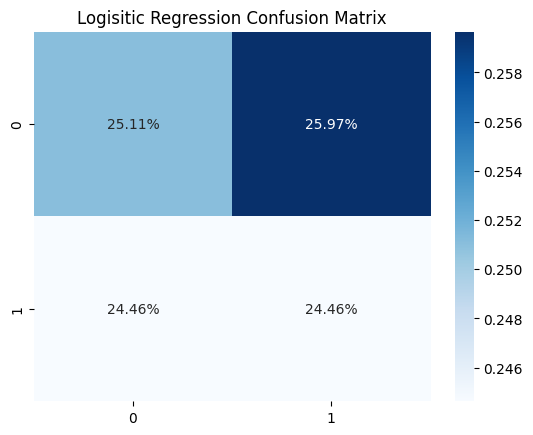

In [ ]:
LogReg2_cm = confusion_matrix(y_test, LogReg2_pred)
sns.heatmap(LogReg2_cm/np.sum(LogReg2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Logisitic Regression Confusion Matrix")

K-Nearest TUNEADO

In [ ]:
KNN2 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 1, weights ='uniform')
KNN2.fit(X_train, y_train)
KNN2_pred = KNN2.predict(X_test)
KNN2_acc = accuracy_score(y_test, KNN2_pred)
KNN2_mae = mean_absolute_error(y_test, KNN2_pred)
KNN2_mse = mean_squared_error(y_test, KNN2_pred)
KNN2_rmse = np.sqrt(mean_squared_error(y_test, KNN2_pred))
KNN2_precision = precision_score(y_test, KNN2_pred) 
KNN2_recall = recall_score(y_test, KNN2_pred) 
KNN2_f1 = f1_score(y_test, KNN2_pred)

In [ ]:
print("The accuracy for KNeighbors is", KNN2_acc)
print("The classification report using KNeighbors is:", KNN2_acc)
print(classification_report(y_test, KNN2_pred))

The accuracy for KNeighbors is 0.7875536480686696
The classification report using KNeighbors is: 0.7875536480686696
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       238
           1       0.75      0.84      0.79       228

    accuracy                           0.79       466
   macro avg       0.79      0.79      0.79       466
weighted avg       0.79      0.79      0.79       466



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

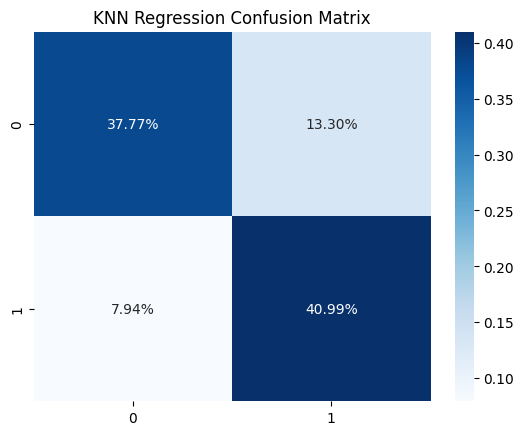

In [ ]:
KNN2_cm = confusion_matrix(y_test, KNN2_pred)
sns.heatmap(KNN2_cm/np.sum(KNN2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("KNN Regression Confusion Matrix")

#3. Decision Tree TUNEADO

In [ ]:
DecTree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 44, min_samples_leaf = 1)
DecTree2.fit(X_train, y_train)
DecTree2_pred = DecTree2.predict(X_test)
DecTree2_acc = accuracy_score(y_test, DecTree2_pred)
DecTree2_precision = precision_score(y_test, DecTree2_pred) 
DecTree2_recall = recall_score(y_test, DecTree2_pred) 
DecTree2_f1 = f1_score(y_test, DecTree2_pred)

In [ ]:
print("The accuracy for Decision Tree is", DecTree2_acc)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DecTree2_pred))

The accuracy for Decision Tree is 0.8111587982832618
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       238
           1       0.76      0.89      0.82       228

    accuracy                           0.81       466
   macro avg       0.82      0.81      0.81       466
weighted avg       0.82      0.81      0.81       466



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

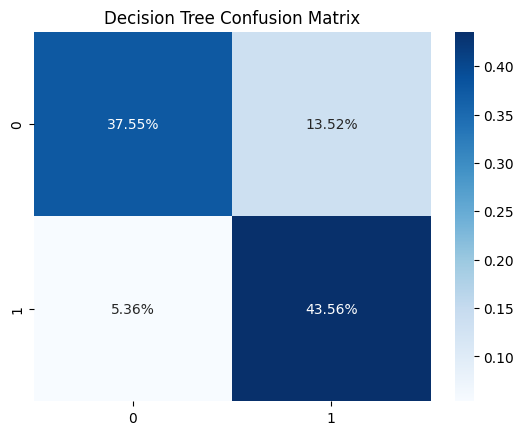

In [ ]:
DecTree2_cm = confusion_matrix(y_test, DecTree2_pred)
sns.heatmap(DecTree2_cm/np.sum(DecTree2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Decision Tree Confusion Matrix")

#4. Random Forest TUNEADO

In [ ]:
RFTree2 = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 200)
RFTree2.fit(X_train, y_train)
RFTree2_pred = RFTree2.predict(X_test)
RFTree2_acc = accuracy_score(y_test, RFTree2_pred)
RFTree2_precision = precision_score(y_test, RFTree2_pred) 
RFTree2_recall = recall_score(y_test, RFTree2_pred) 
RFTree2_f1 = f1_score(y_test, RFTree2_pred)

In [ ]:
print("The accuracy for Random Forest is", RFTree2_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RFTree2_pred))

The accuracy for Random Forest is 0.8412017167381974
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       238
           1       0.84      0.83      0.84       228

    accuracy                           0.84       466
   macro avg       0.84      0.84      0.84       466
weighted avg       0.84      0.84      0.84       466



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

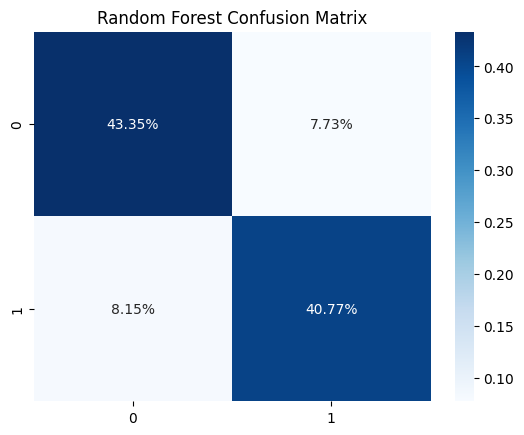

In [ ]:
RFTree2_cm = confusion_matrix(y_test, RFTree2_pred)
sns.heatmap(RFTree2_cm/np.sum(RFTree2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Random Forest Confusion Matrix")

#5. Support Vector Machine TUNEADO

In [ ]:
SVM2 = SVC(C = 10, gamma = 1, kernel = 'rbf')
SVM2.fit(X_train, y_train)
SVM2_pred = SVM2.predict(X_test)
SVM2_acc = accuracy_score(y_test, SVM2_pred)
SVM2_precision = precision_score(y_test, SVM2_pred) 
SVM2_recall = recall_score(y_test, SVM2_pred) 
SVM2_f1 = f1_score(y_test, SVM2_pred)

In [ ]:
print("The accuracy for SVM is", SVM2_acc)
print("The classification report using SVM is:", SVM2_acc)
print(classification_report(y_test, SVM2_pred))

The accuracy for SVM is 0.851931330472103
The classification report using SVM is: 0.851931330472103
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       238
           1       0.91      0.77      0.84       228

    accuracy                           0.85       466
   macro avg       0.86      0.85      0.85       466
weighted avg       0.86      0.85      0.85       466



Text(0.5, 1.0, 'SVM Confusion Matrix')

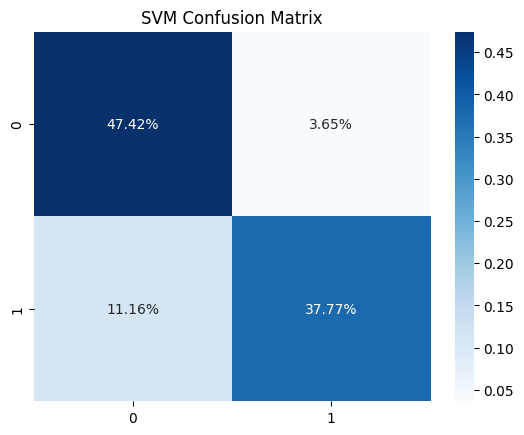

In [ ]:
SVM2_cm = confusion_matrix(y_test, SVM2_pred)
sns.heatmap(SVM2_cm/np.sum(SVM2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("SVM Confusion Matrix")

#6. XGBoost Classifier TUNEADO

In [ ]:
XGB2 = XGBClassifier(n_estimators = 600, learning_rate = 0.8)
XGB2.fit(X_train, y_train)
XGB2_pred = XGB2.predict(X_test)
XGB2_acc = accuracy_score(y_test, XGB2_pred)
XGB2_precision = precision_score(y_test, XGB2_pred)
XGB2_recall = recall_score(y_test, XGB2_pred)
XGB2_f1 = f1_score(y_test, XGB2_pred)

In [ ]:
print("The accuracy for XGBoost is", XGB2_acc)
print("The classification report using XGBoost is:", XGB2_acc)
print(classification_report(y_test, XGB2_pred))

The accuracy for XGBoost is 0.8025751072961373
The classification report using XGBoost is: 0.8025751072961373
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       238
           1       0.77      0.84      0.81       228

    accuracy                           0.80       466
   macro avg       0.80      0.80      0.80       466
weighted avg       0.81      0.80      0.80       466



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

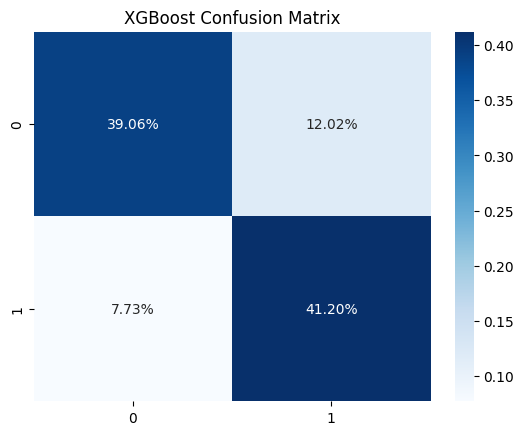

In [ ]:
XGB2_cm = confusion_matrix(y_test, XGB2_pred)
sns.heatmap(XGB2_cm/np.sum(XGB2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("XGBoost Confusion Matrix")

#MODELOS TUNEADOS

In [ ]:
models2 = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    'Accuracy' :[LogReg2_acc, KNN2_acc, DecTree2_acc, RFTree2_acc, SVM2_acc, XGB2_acc],
    'Precision' :[LogReg2_precision, KNN2_precision, DecTree2_precision, RFTree2_precision, SVM2_precision, XGB2_precision],
    'Recall' :[LogReg2_recall, KNN2_recall, DecTree2_recall, RFTree2_recall, SVM2_recall, XGB2_recall],
    'F1 Score' :[LogReg2_f1, KNN2_f1, DecTree2_f1, RFTree2_f1, SVM2_f1, XGB2_f1]
})
models2 = models2.sort_values(by='Accuracy', ascending=False)

In [ ]:
models2

,Model,Accuracy,Precision,Recall,F1 Score
4,Support Vector,0.851931,0.911917,0.771930,0.836105
3,Random Forest,0.841202,0.840708,0.833333,0.837004
2,Decision Tree,0.811159,0.763158,0.890351,0.821862
5,XGBoost,0.802575,0.774194,0.842105,0.806723
1,KNN Regression,0.787554,0.754941,0.837719,0.794179
0,Logistic Regression,0.495708,0.485106,0.500000,0.492441


In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(#StandardScaler(),PCA(n_components=2),
                     LogisticRegression())
  
#fitting data into the model
pipe.fit(X_train, y_train)
  
# predicting values
y_pred = pipe.predict(X_test)
  
# calculating accuracy score
accuracy_score = accuracy_score(y_test, y_pred)
print('accuracy score : ',accuracy_score)


LogReg_mae = mean_absolute_error(y_test, y_pred)
LogReg_mse = mean_squared_error(y_test, y_pred)
LogReg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
LogReg_precision = precision_score(y_test, y_pred)
LogReg_recall = recall_score(y_test, y_pred)
LogReg_f1 = f1_score(y_test, y_pred)

print("The accuracy for Logistic Regression is", LogReg_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))

accuracy score :  0.4978540772532189
The accuracy for Logistic Regression is 0.4978540772532189
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       238
           1       0.49      0.51      0.50       228

    accuracy                           0.50       466
   macro avg       0.50      0.50      0.50       466
weighted avg       0.50      0.50      0.50       466



In [ ]:
# import packages PROPIO
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, recall_score, f1_score
#from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
#SVC(C = 10, gamma = 1, kernel = 'rbf')
pipe = make_pipeline(#StandardScaler(),#PCA(n_components=2),
                    SVC(C = 10, gamma = 1, kernel = 'rbf'))
pipe.fit(X_train, y_train)
SVM2_pred = pipe.predict(X_test)
accuracy_score = accuracy_score(y_test, SVM2_pred)
print('accuracy score : ',accuracy_score)
SVM2_mae = mean_absolute_error(y_test, SVM2_pred)
SVM2_mse = mean_squared_error(y_test, SVM2_pred)
SVM2_rmse = np.sqrt(mean_squared_error(y_test, SVM2_pred))
SVM2_precision = precision_score(y_test, SVM2_pred)
SVM2_recall = recall_score(y_test, SVM2_pred)
SVM2_f1 = f1_score(y_test, SVM2_pred)
print("The accuracy for MSV is", SVM2_acc)
print("The classification report using MSV is:")
print(classification_report(y_test, SVM2_pred))

accuracy score :  0.851931330472103
The accuracy for MSV is 0.851931330472103
The classification report using MSV is:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       238
           1       0.91      0.77      0.84       228

    accuracy                           0.85       466
   macro avg       0.86      0.85      0.85       466
weighted avg       0.86      0.85      0.85       466

